# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from torch.autograd import Variable
import torch
import torchvision

## Carregamento dos dados do MNIST

In [2]:
! git clone https://github.com/vcasadei/MNIST.git

Cloning into 'MNIST'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10 (from 1)
Receiving objects: 100% (10/10), 11.01 MiB | 11.11 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [3]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


<ipython-input-3-6143b94785d1>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')


### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [4]:
x_train = x_train.float()

x_train = x_train / 255.

if True:
    n_samples_train = 1000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 1000

Dimensões dos dados das imagens:    torch.Size([1000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(-0.5, 232.5, 87.5, -0.5)

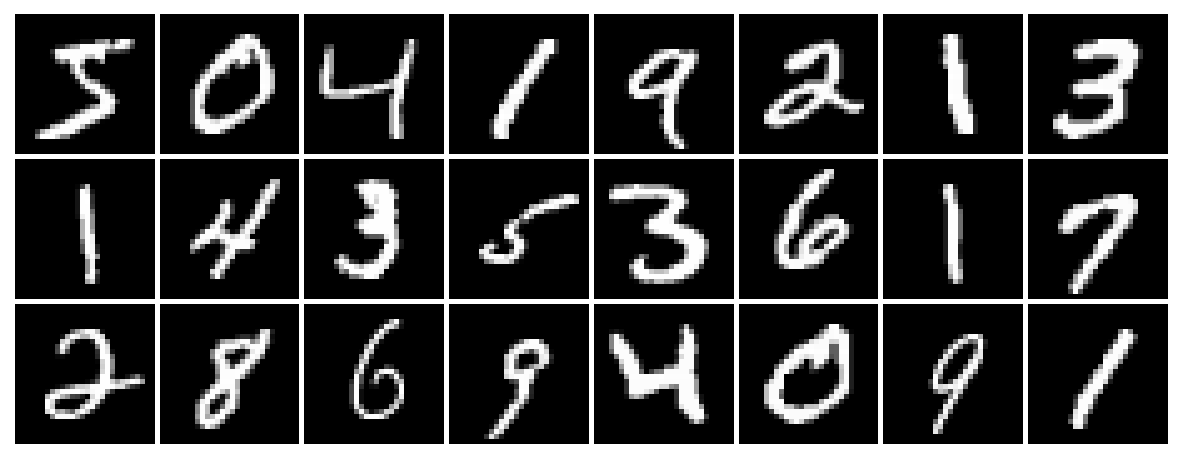

In [5]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

### Visualizando uma imagem com o matplotlib

class: tensor(5)


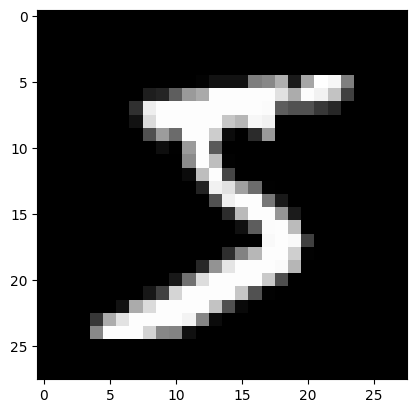

In [6]:
image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy().reshape(28,28), cmap='gray')
print('class:', target)

## Modelo

In [7]:
model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na sáida

### Testando um predict com poucas amostras

In [8]:
## TODO
x_predict = x_train[0].view(-1, 28*28)
predict = model(x_predict)
predict

tensor([[-0.3151,  0.1084, -0.2645, -0.2206, -0.1487,  0.3069, -0.0205, -0.1108,
          0.1157, -0.6523]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [9]:
epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [10]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-4zcn2g2_
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-4zcn2g2_
  Resolved https://github.com/szagoruyko/pytorchviz to commit 0adcd83af8aa7ab36d6afd139cabbd9df598edb7
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4972 sha256=2644c61c0442c2a1bd588d8ca1ffdba0963171e26980f263e989db61deb562c3
  Stored in directory: /tmp/pip-ephem-wheel-cache-emr52fsh/wheels/44/5a/39/48c1209682afcfc7ad8ae7b3cf7aa0ff08a72e3ac4e5931f1d
Successfully built torchviz


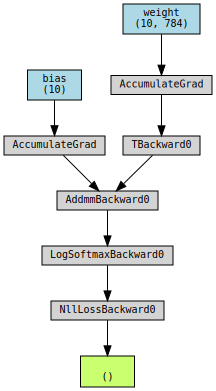

In [11]:
y_pred = model(Variable(x_train.view(-1,28*28)))
loss = criterion(y_pred, Variable(y_train))
from torchviz import make_dot, make_dot_from_trace
p = make_dot(loss, dict(model.named_parameters()))
p

### Laço de treinamento dos pesos

In [12]:
from IPython import display
import numpy
a = 5
losses = []
zs = []
fig = plt.figure(figsize=(18, 6))

try:
    for i in range(epochs):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # Predict da rede
        outputs = model(inputs)
        zs.append(outputs[1].detach().numpy())

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.data)
        _, predicts = torch.max(outputs, 1)

        y_pred = predicts.data
        accuracy = (y_pred.numpy() == y_train.numpy()).mean()

except KeyboardInterrupt:
    pass

<Figure size 1800x600 with 0 Axes>

In [13]:
model.weight.grad

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [14]:
print('Final loss:', loss.data)

Final loss: tensor(1.0956)


### Visualizando gráfico de perda durante o treinamento

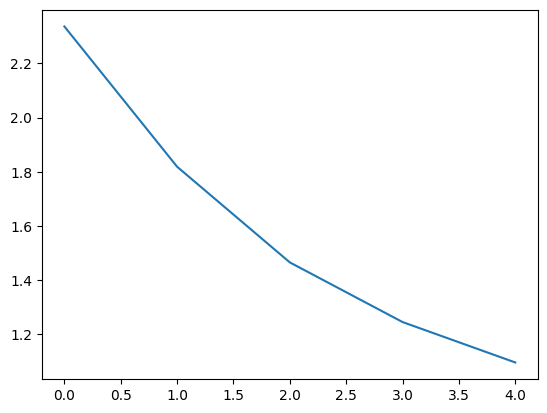

In [15]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [16]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.821


### Matriz de confusão com dados de treinamento e teste

In [17]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

Matriz de confusão:


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,93,0,3,1,0,2,2,2,0,2
1,0,109,12,1,1,2,3,9,8,1
2,2,0,70,0,1,3,0,1,3,0
3,0,1,2,82,0,21,0,0,8,2
4,0,0,2,0,94,4,2,4,0,5
5,0,1,0,1,0,50,1,0,1,2
6,2,1,2,2,2,5,86,0,1,0
7,0,0,5,3,1,1,0,96,0,10
8,0,4,2,2,0,1,0,0,64,1


## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


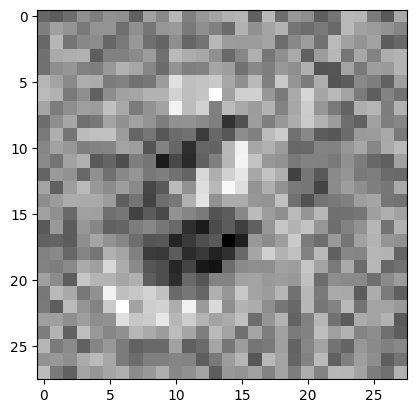

In [18]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[3, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

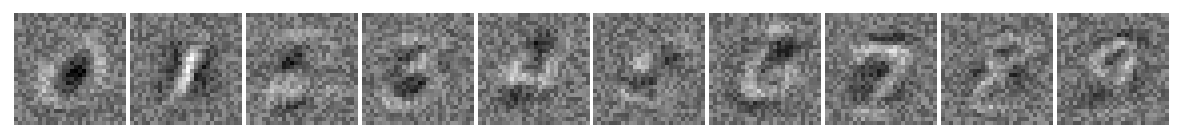

In [19]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

- 2) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

In [24]:
model = torch.nn.Linear(28*28, 10)
epochs = 100
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

Acurácia: 0.131
epoca: 1
perda: 2.3001747


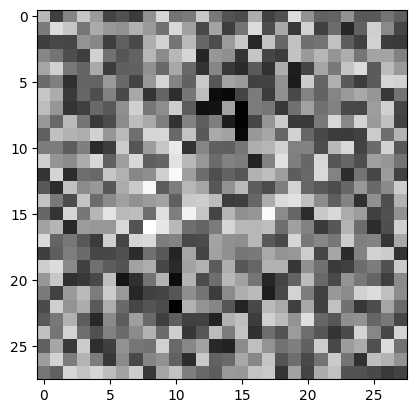

Acurácia: 0.65
epoca: 2
perda: 1.7964743


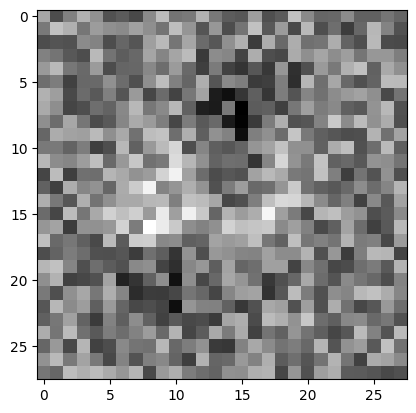

Acurácia: 0.761
epoca: 3
perda: 1.4603746


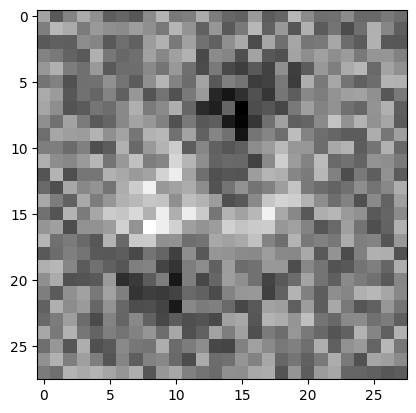

Acurácia: 0.788
epoca: 4
perda: 1.2408241


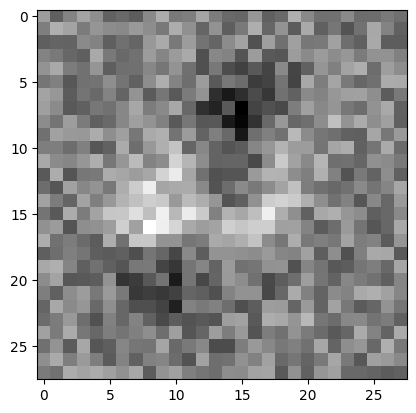

Acurácia: 0.804
epoca: 5
perda: 1.0911505


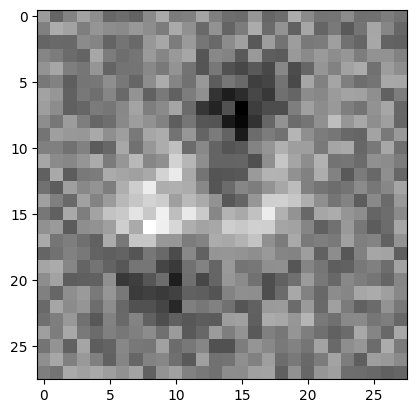

Acurácia: 0.822
epoca: 6
perda: 0.98392946


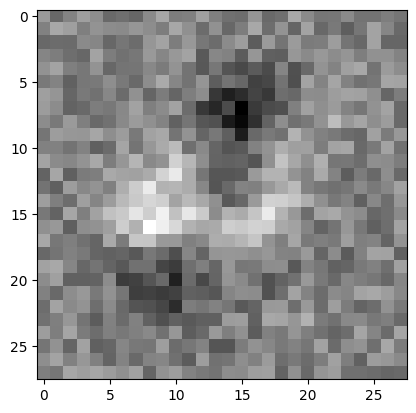

Acurácia: 0.838
epoca: 7
perda: 0.9039747


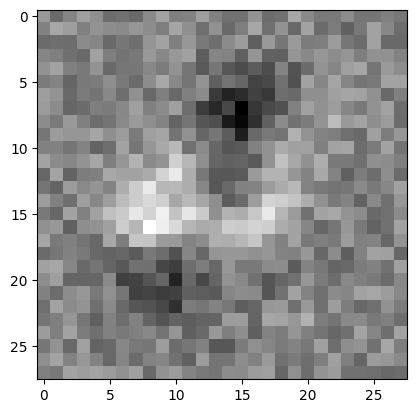

Acurácia: 0.84
epoca: 8
perda: 0.84199786


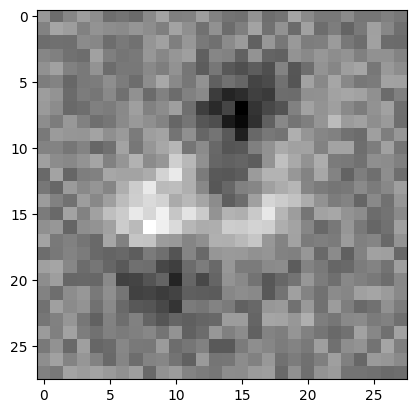

Acurácia: 0.847
epoca: 9
perda: 0.7923079


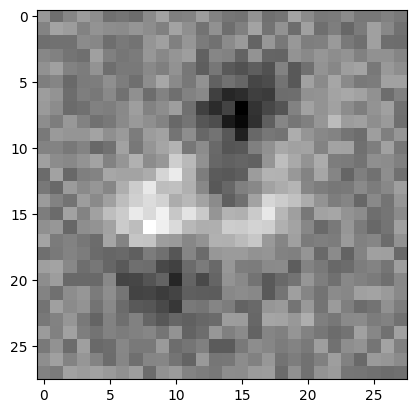

Acurácia: 0.853
epoca: 10
perda: 0.7513586


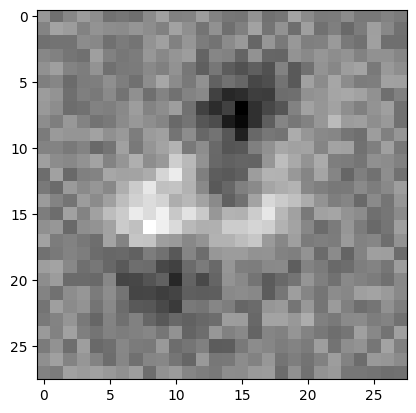

Acurácia: 0.856
epoca: 11
perda: 0.71687484


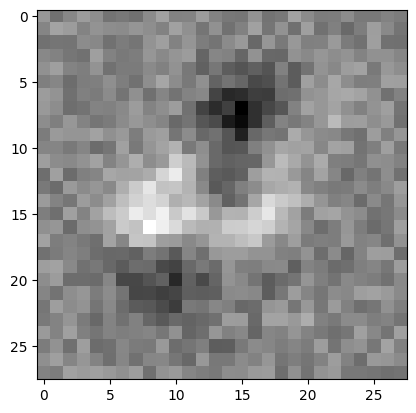

Acurácia: 0.857
epoca: 12
perda: 0.6873247


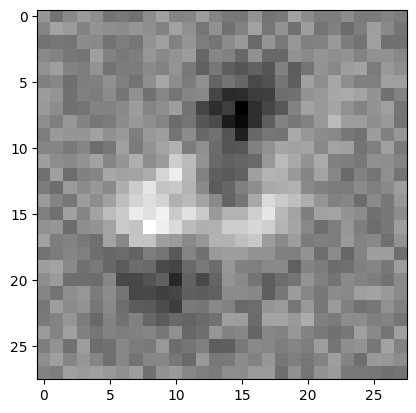

Acurácia: 0.862
epoca: 13
perda: 0.6616345


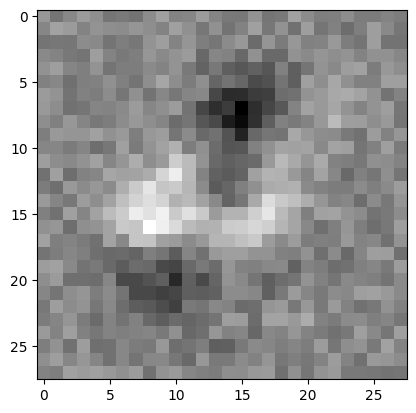

Acurácia: 0.865
epoca: 14
perda: 0.6390268


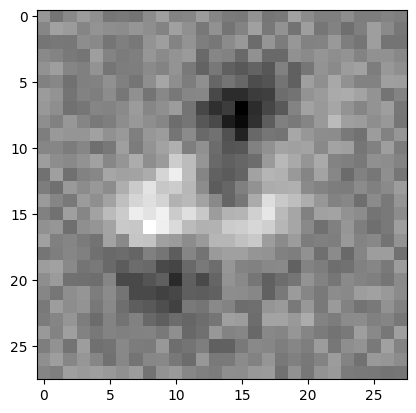

Acurácia: 0.868
epoca: 15
perda: 0.61892444


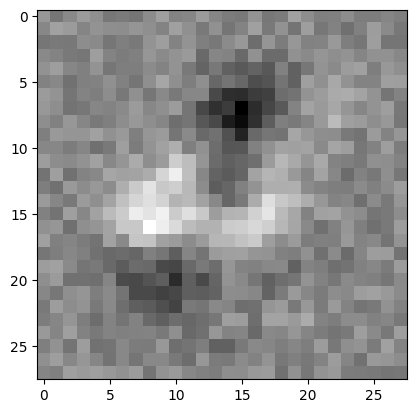

Acurácia: 0.872
epoca: 16
perda: 0.6008894


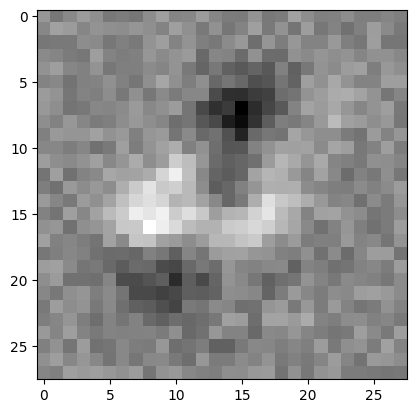

Acurácia: 0.875
epoca: 17
perda: 0.58458304


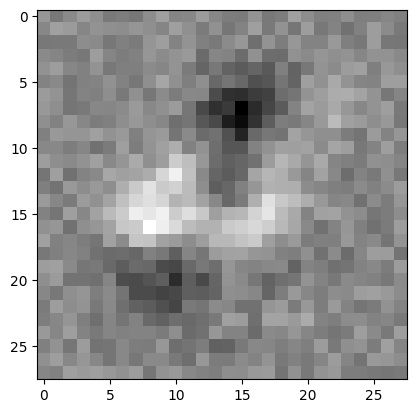

Acurácia: 0.878
epoca: 18
perda: 0.56973916


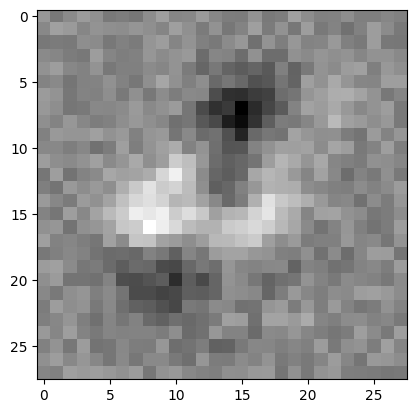

Acurácia: 0.881
epoca: 19
perda: 0.55614495


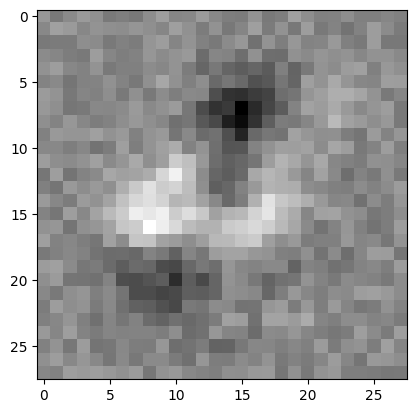

Acurácia: 0.883
epoca: 20
perda: 0.5436288


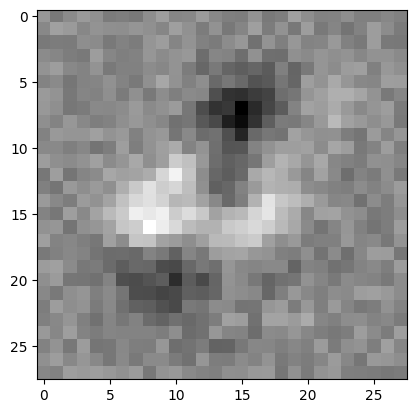

Acurácia: 0.883
epoca: 21
perda: 0.5320501


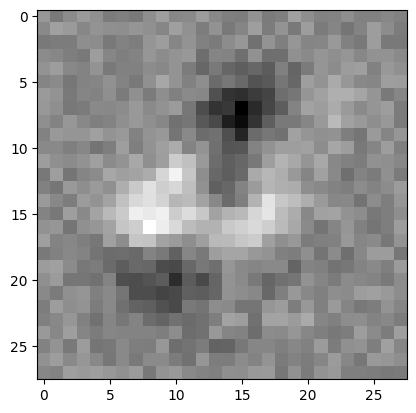

Acurácia: 0.887
epoca: 22
perda: 0.52129257


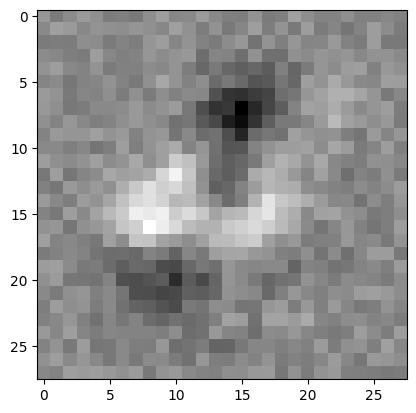

Acurácia: 0.891
epoca: 23
perda: 0.5112592


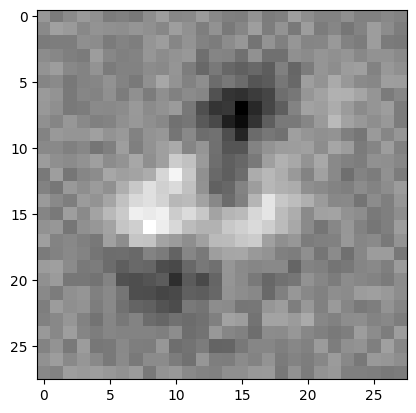

Acurácia: 0.892
epoca: 24
perda: 0.50186855


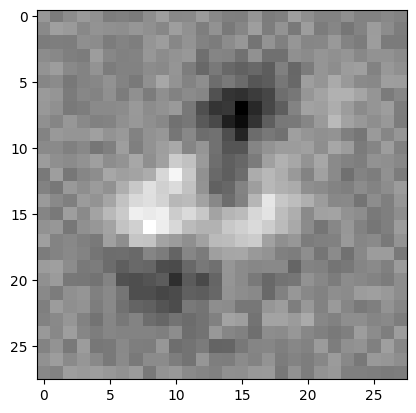

Acurácia: 0.894
epoca: 25
perda: 0.493051


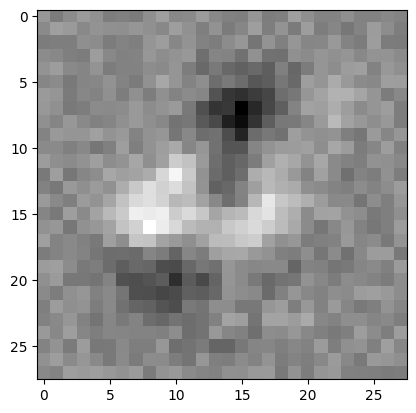

Acurácia: 0.894
epoca: 26
perda: 0.4847475


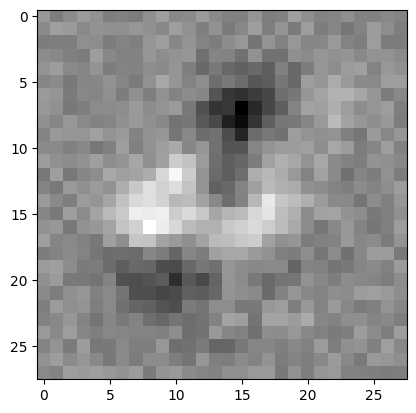

Acurácia: 0.895
epoca: 27
perda: 0.476907


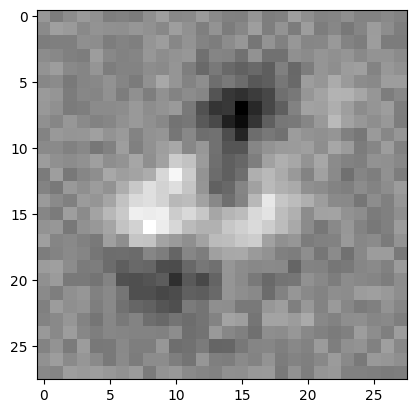

Acurácia: 0.898
epoca: 28
perda: 0.4694854


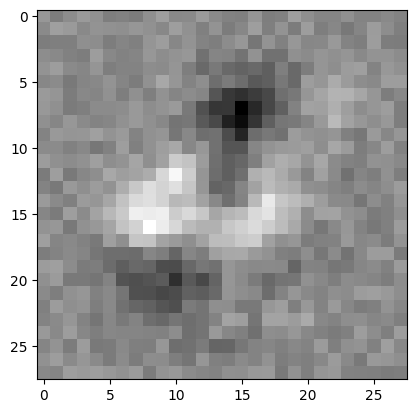

Acurácia: 0.898
epoca: 29
perda: 0.46244422


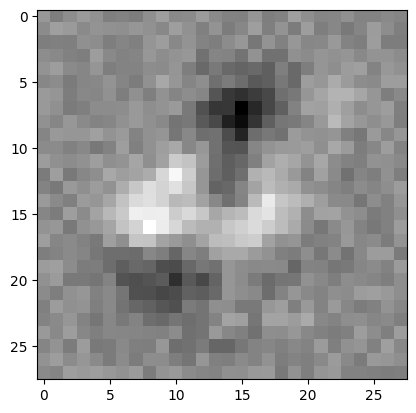

Acurácia: 0.898
epoca: 30
perda: 0.4557498


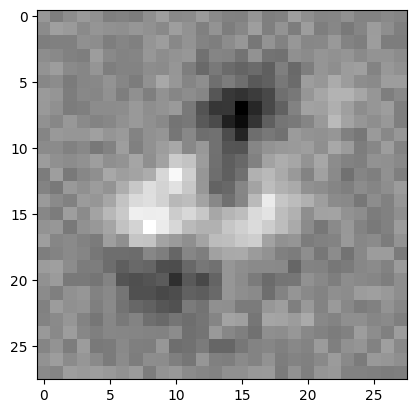

Acurácia: 0.899
epoca: 31
perda: 0.44937262


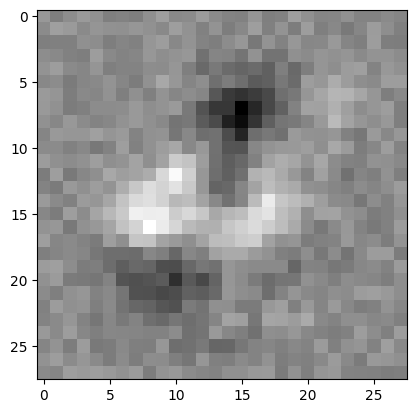

Acurácia: 0.9
epoca: 32
perda: 0.44328648


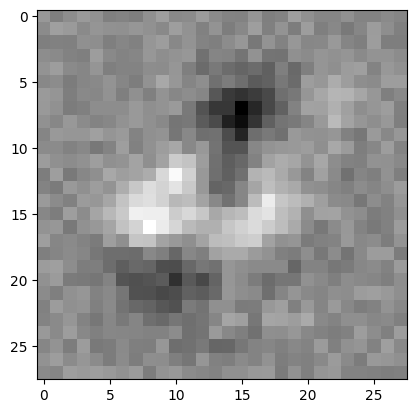

Acurácia: 0.9
epoca: 33
perda: 0.4374682


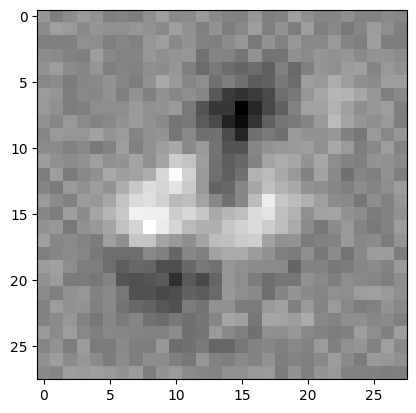

Acurácia: 0.9
epoca: 34
perda: 0.43189707


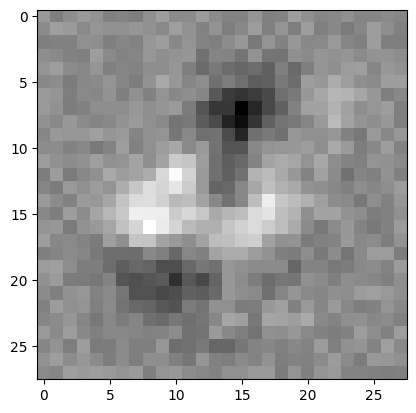

Acurácia: 0.9
epoca: 35
perda: 0.42655462


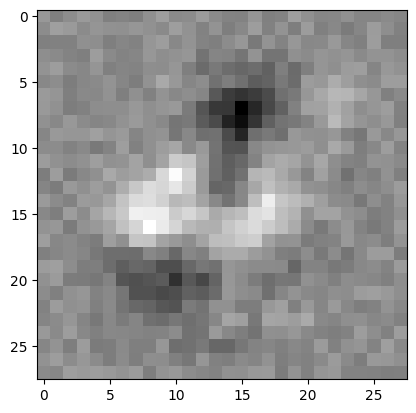

Acurácia: 0.9
epoca: 36
perda: 0.42142436


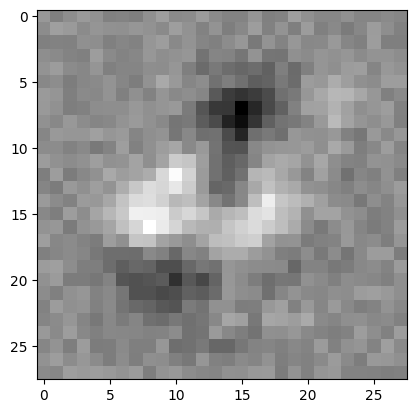

Acurácia: 0.902
epoca: 37
perda: 0.41649118


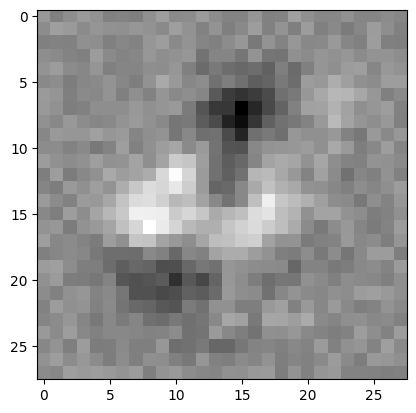

Acurácia: 0.902
epoca: 38
perda: 0.41174182


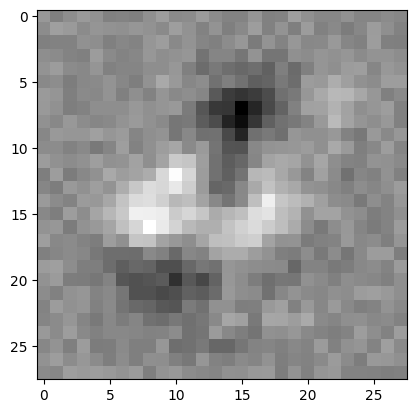

Acurácia: 0.904
epoca: 39
perda: 0.40716392


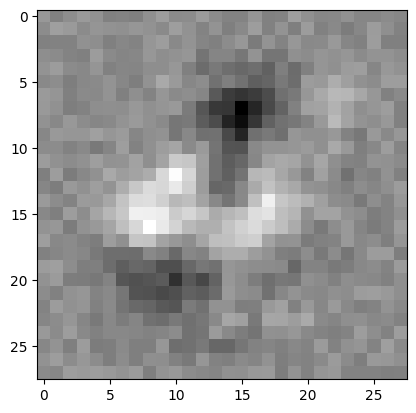

Acurácia: 0.907
epoca: 40
perda: 0.40274644


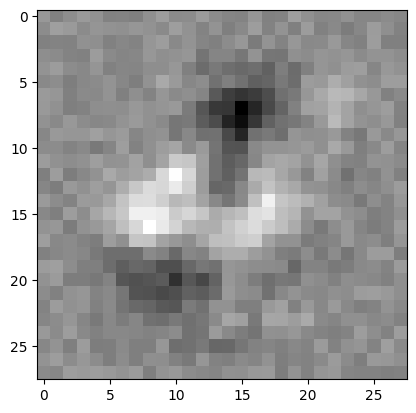

Acurácia: 0.911
epoca: 41
perda: 0.39847928


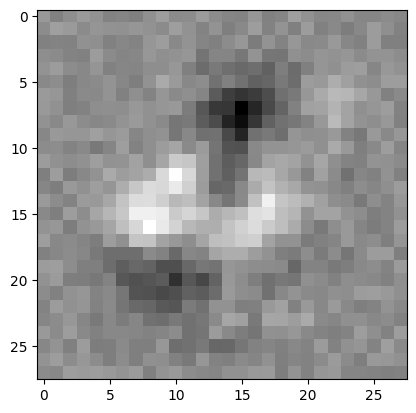

Acurácia: 0.912
epoca: 42
perda: 0.39435324


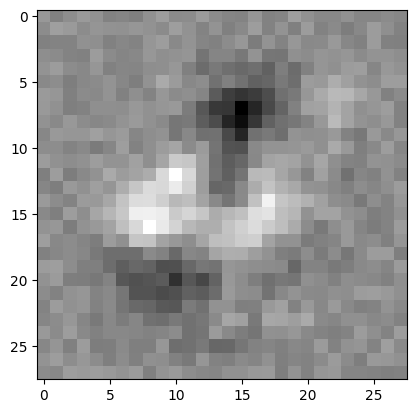

Acurácia: 0.914
epoca: 43
perda: 0.3903599


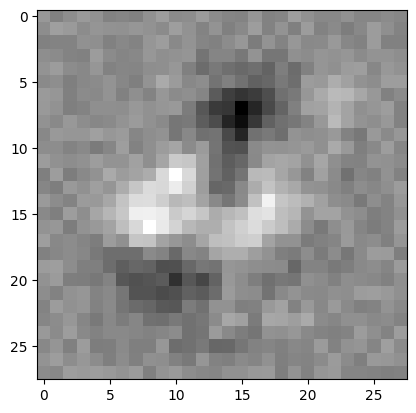

Acurácia: 0.915
epoca: 44
perda: 0.38649148


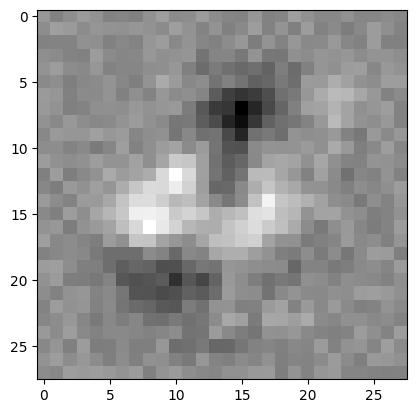

Acurácia: 0.915
epoca: 45
perda: 0.382741


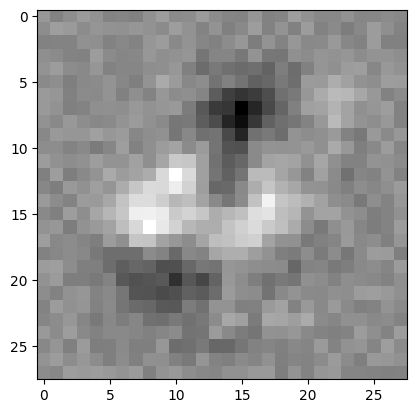

Acurácia: 0.916
epoca: 46
perda: 0.37910178


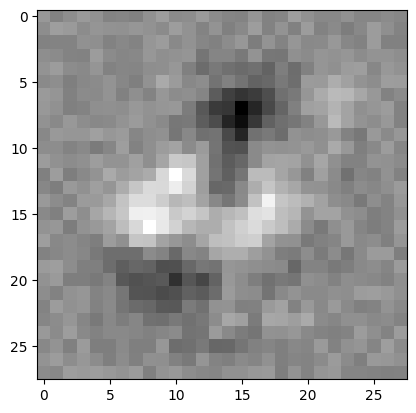

Acurácia: 0.917
epoca: 47
perda: 0.37556785


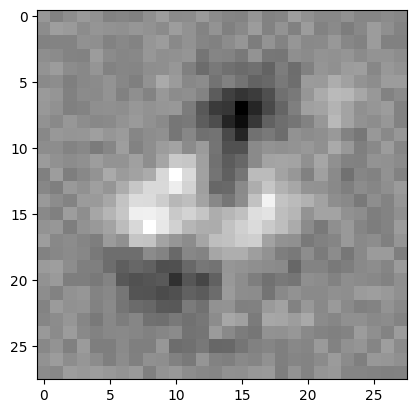

Acurácia: 0.917
epoca: 48
perda: 0.37213364


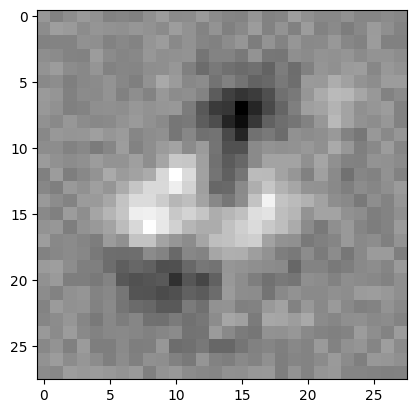

Acurácia: 0.918
epoca: 49
perda: 0.36879402


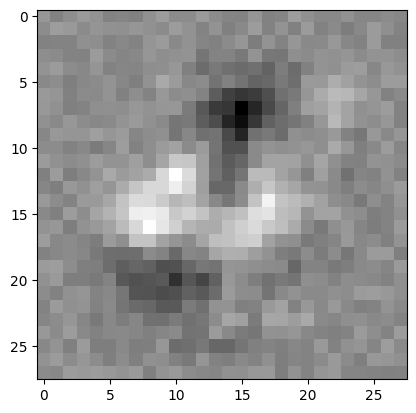

Acurácia: 0.919
epoca: 50
perda: 0.3655442


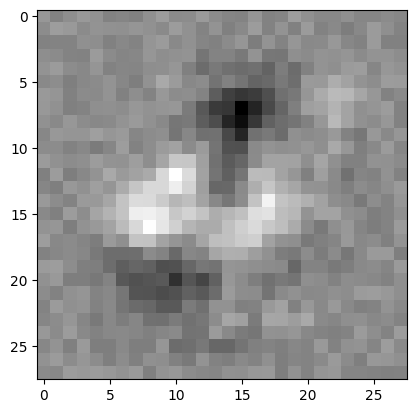

Acurácia: 0.92
epoca: 51
perda: 0.36237964


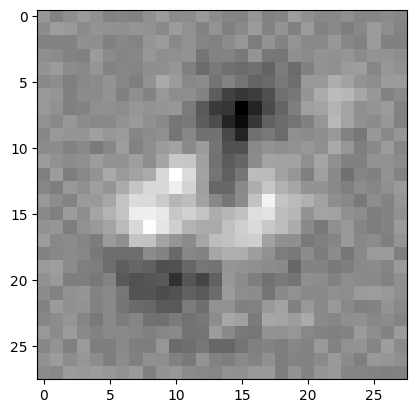

Acurácia: 0.922
epoca: 52
perda: 0.35929623


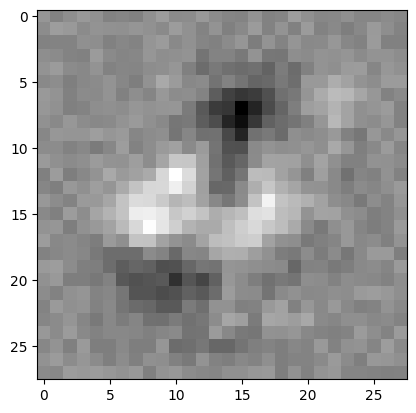

Acurácia: 0.922
epoca: 53
perda: 0.35629028


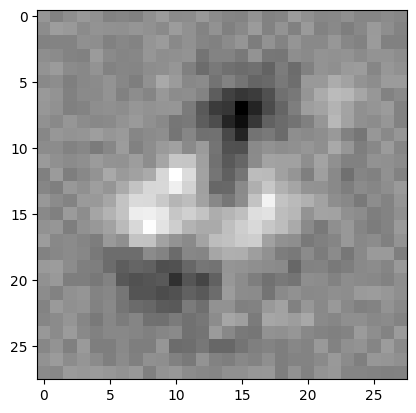

Acurácia: 0.924
epoca: 54
perda: 0.35335806


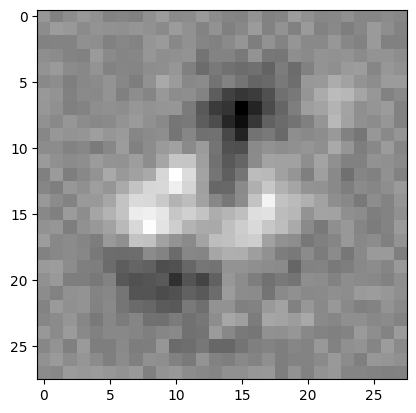

Acurácia: 0.924
epoca: 55
perda: 0.35049623


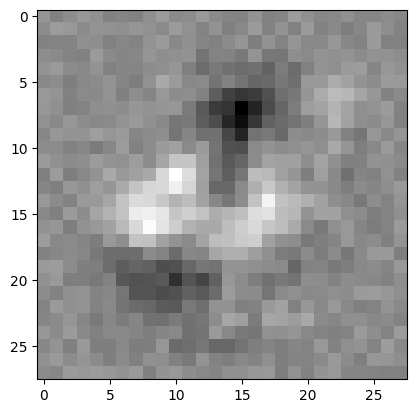

Acurácia: 0.924
epoca: 56
perda: 0.34770167


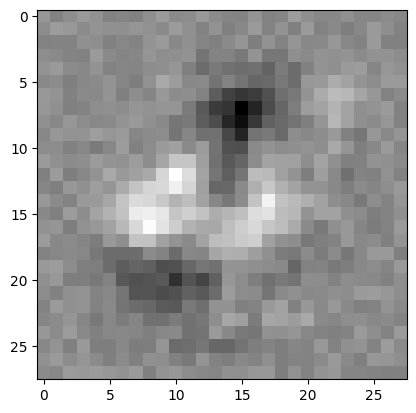

Acurácia: 0.924
epoca: 57
perda: 0.3449714


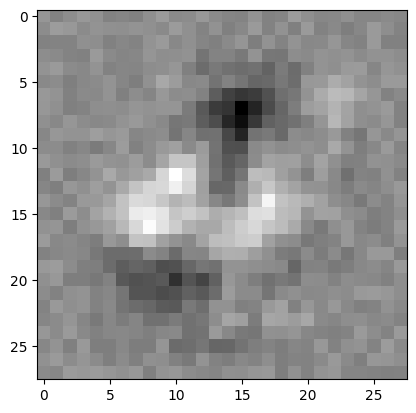

Acurácia: 0.924
epoca: 58
perda: 0.34230265


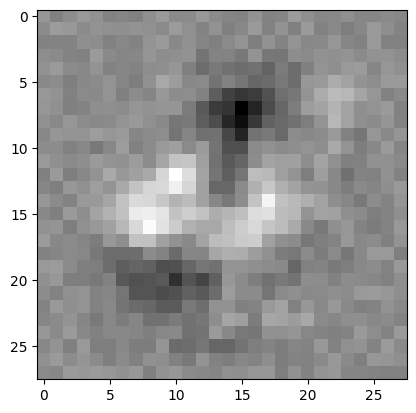

Acurácia: 0.924
epoca: 59
perda: 0.33969292


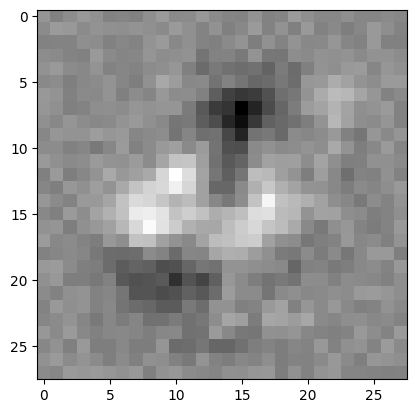

Acurácia: 0.925
epoca: 60
perda: 0.33713967


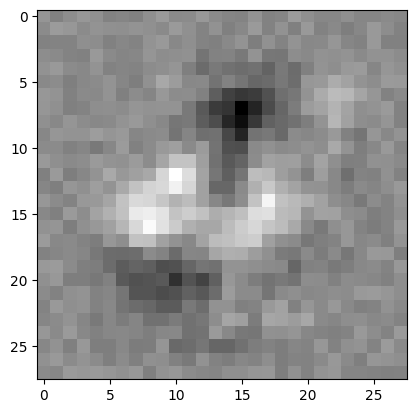

Acurácia: 0.925
epoca: 61
perda: 0.33464065


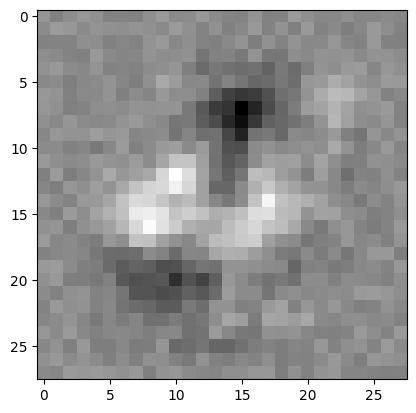

Acurácia: 0.925
epoca: 62
perda: 0.3321938


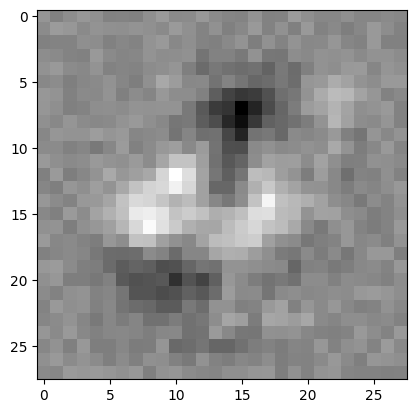

Acurácia: 0.926
epoca: 63
perda: 0.329797


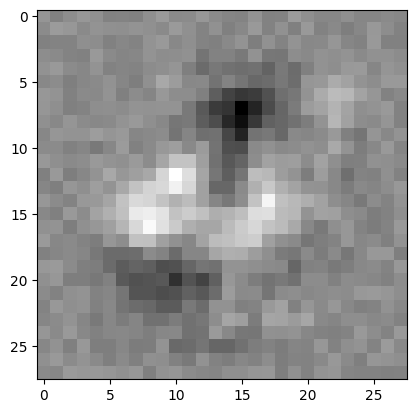

Acurácia: 0.926
epoca: 64
perda: 0.32744825


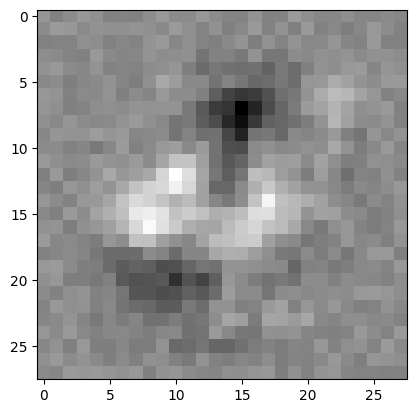

Acurácia: 0.926
epoca: 65
perda: 0.3251459


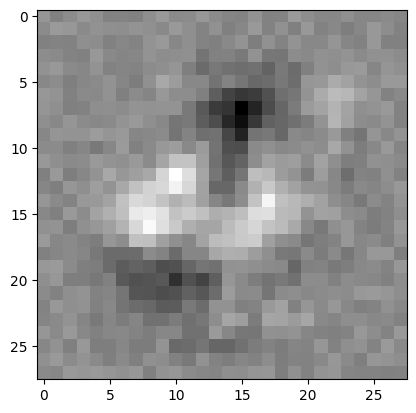

Acurácia: 0.926
epoca: 66
perda: 0.32288808


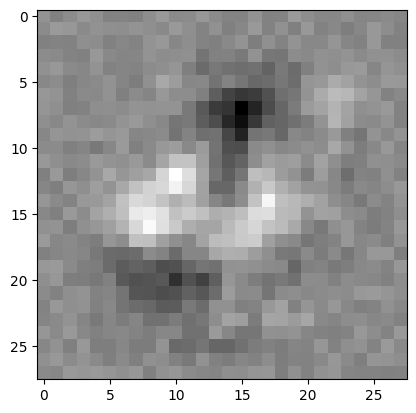

Acurácia: 0.926
epoca: 67
perda: 0.32067323


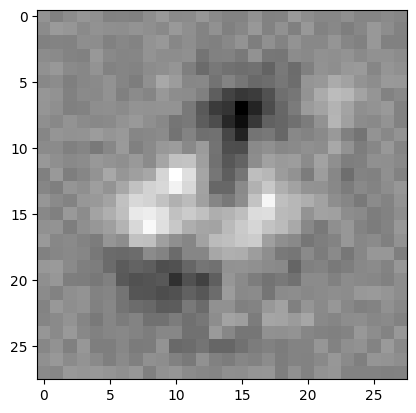

Acurácia: 0.927
epoca: 68
perda: 0.31849983


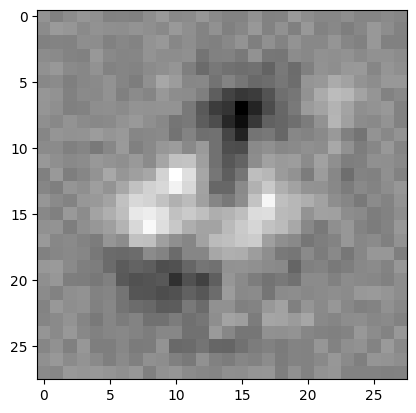

Acurácia: 0.927
epoca: 69
perda: 0.31636643


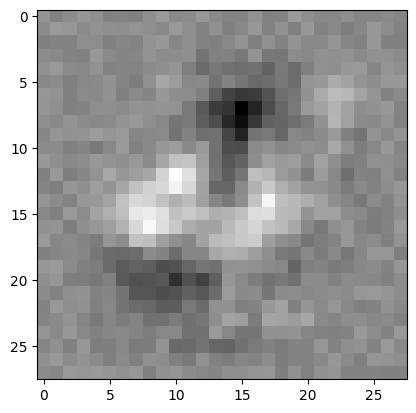

Acurácia: 0.927
epoca: 70
perda: 0.31427166


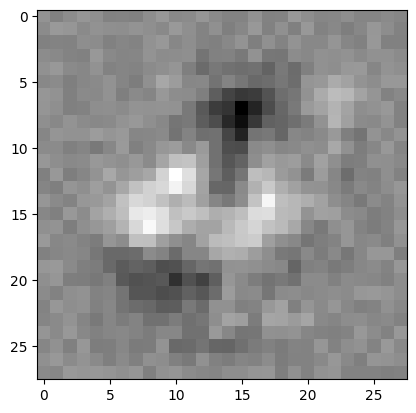

Acurácia: 0.929
epoca: 71
perda: 0.31221408


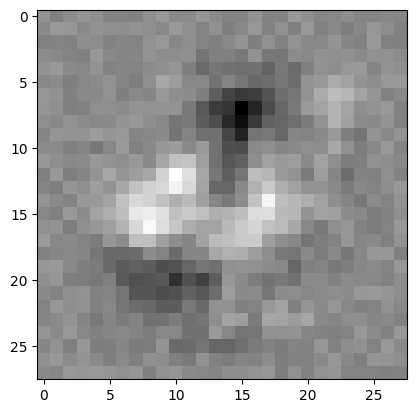

Acurácia: 0.931
epoca: 72
perda: 0.3101926


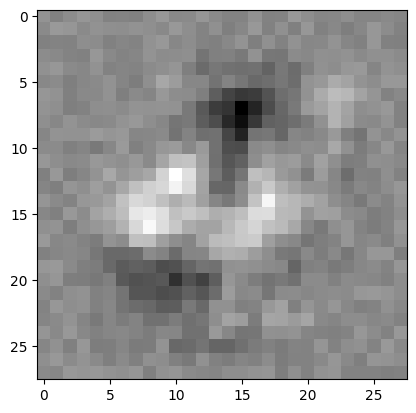

Acurácia: 0.931
epoca: 73
perda: 0.30820593


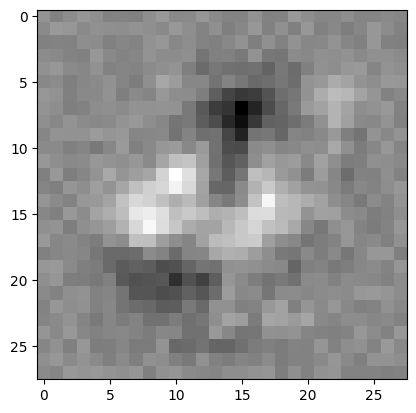

Acurácia: 0.931
epoca: 74
perda: 0.306253


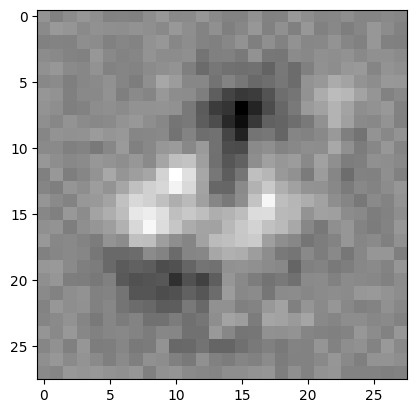

Acurácia: 0.931
epoca: 75
perda: 0.30433264


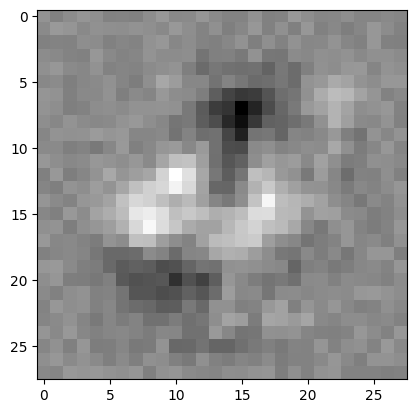

Acurácia: 0.931
epoca: 76
perda: 0.30244392


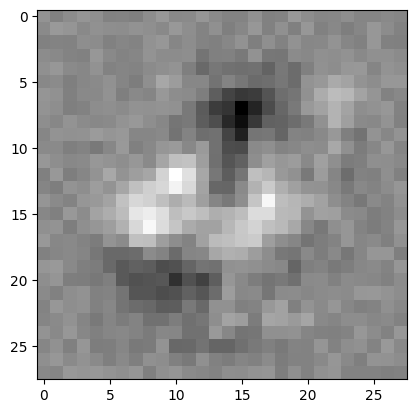

Acurácia: 0.931
epoca: 77
perda: 0.3005858


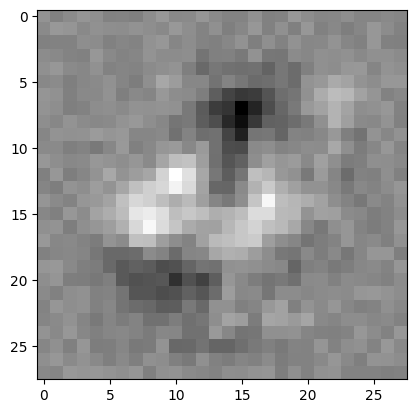

Acurácia: 0.932
epoca: 78
perda: 0.29875737


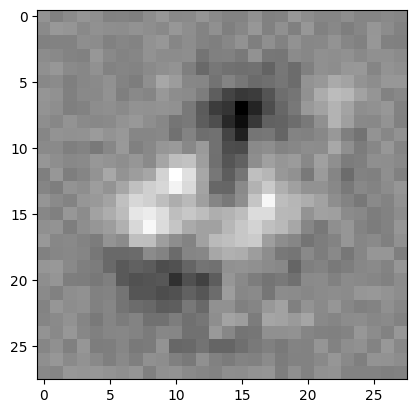

Acurácia: 0.932
epoca: 79
perda: 0.2969578


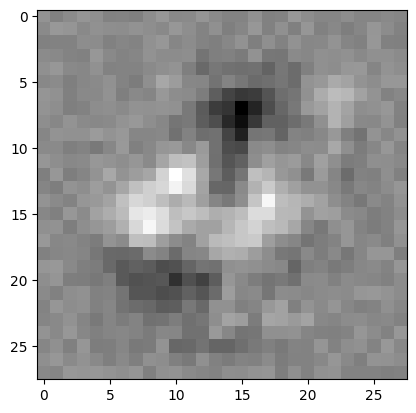

Acurácia: 0.932
epoca: 80
perda: 0.2951861


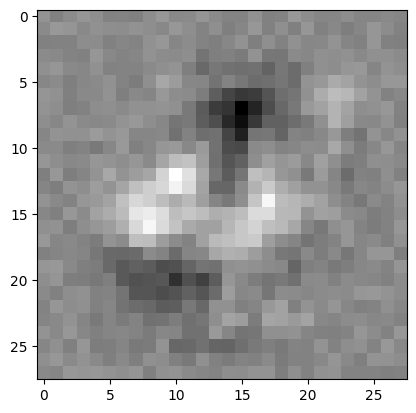

Acurácia: 0.933
epoca: 81
perda: 0.2934415


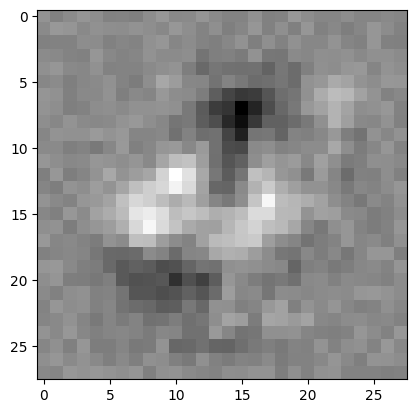

Acurácia: 0.933
epoca: 82
perda: 0.29172322


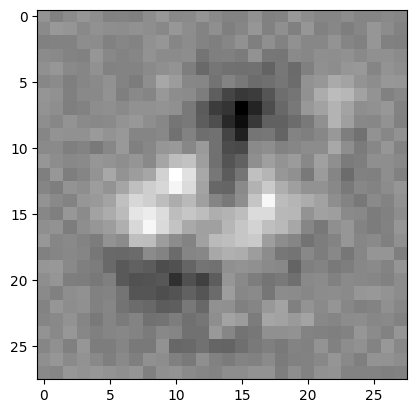

Acurácia: 0.933
epoca: 83
perda: 0.2900306


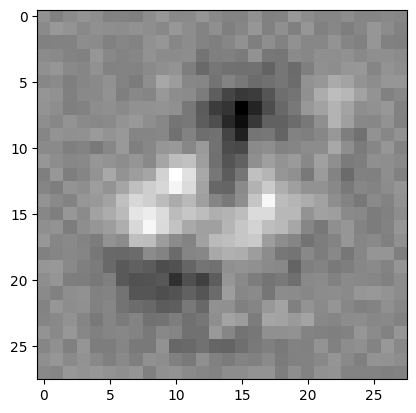

Acurácia: 0.933
epoca: 84
perda: 0.2883628


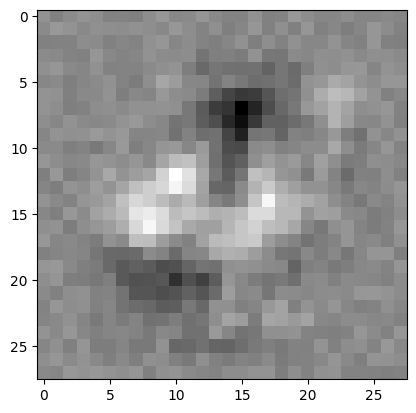

Acurácia: 0.933
epoca: 85
perda: 0.28671926


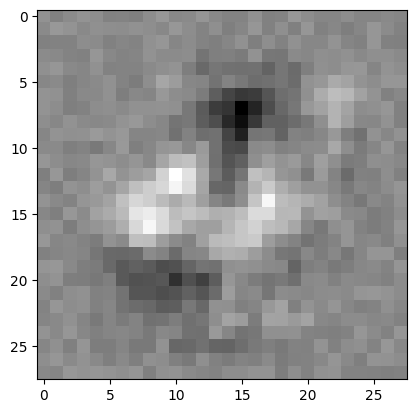

Acurácia: 0.933
epoca: 86
perda: 0.28509912


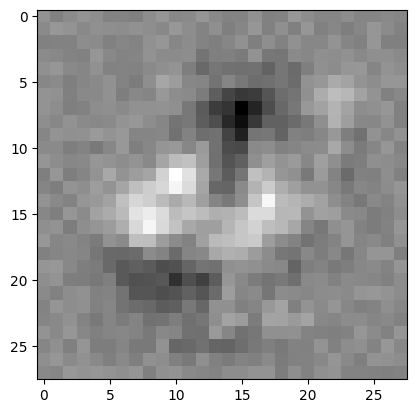

Acurácia: 0.935
epoca: 87
perda: 0.28350198


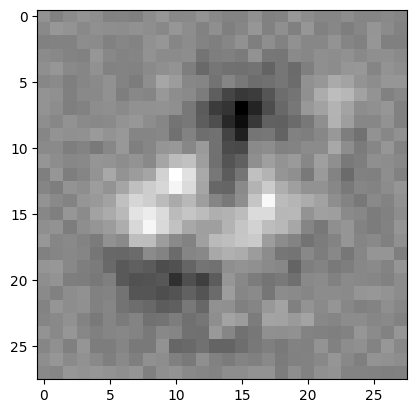

Acurácia: 0.935
epoca: 88
perda: 0.28192705


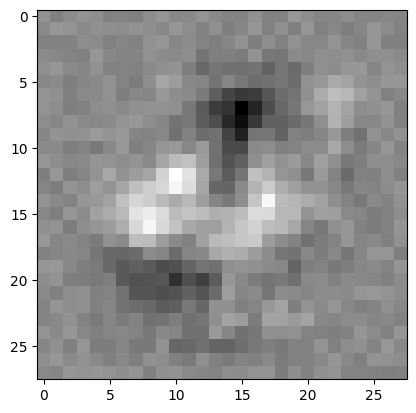

Acurácia: 0.936
epoca: 89
perda: 0.28037387


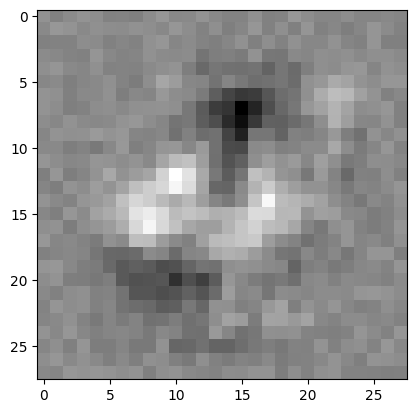

Acurácia: 0.936
epoca: 90
perda: 0.27884182


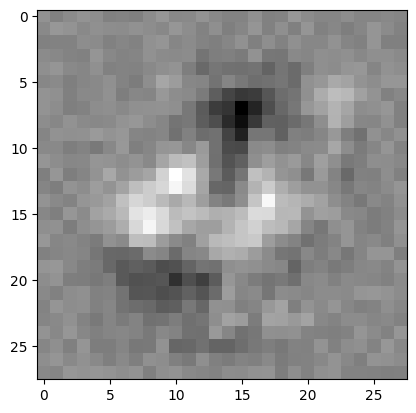

Acurácia: 0.936
epoca: 91
perda: 0.27733034


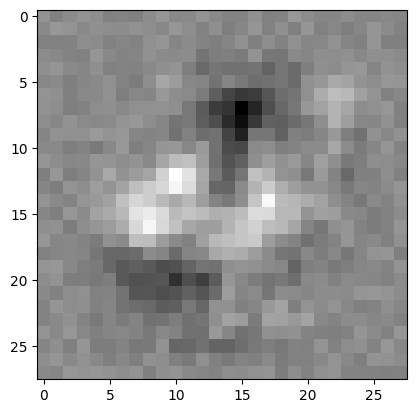

Acurácia: 0.937
epoca: 92
perda: 0.27583894


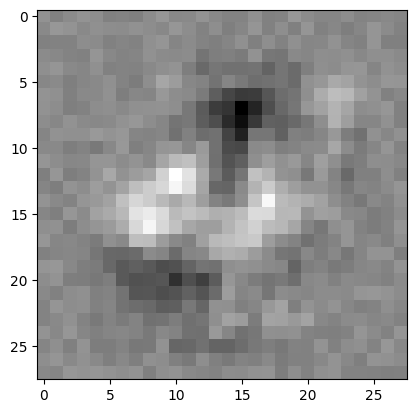

Acurácia: 0.938
epoca: 93
perda: 0.27436718


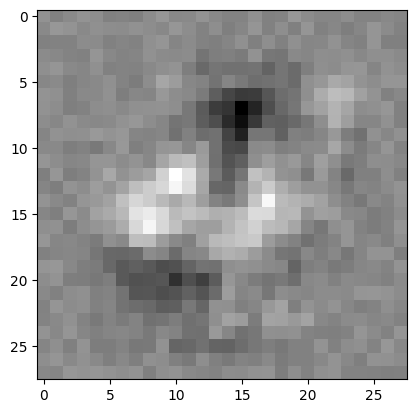

Acurácia: 0.938
epoca: 94
perda: 0.27291444


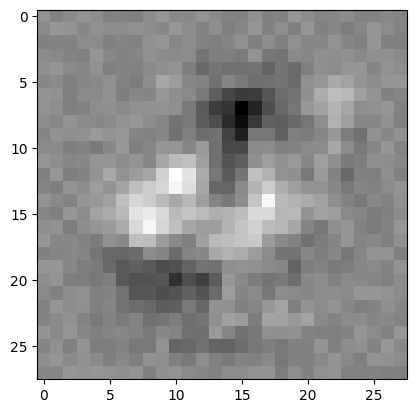

Acurácia: 0.938
epoca: 95
perda: 0.2714804


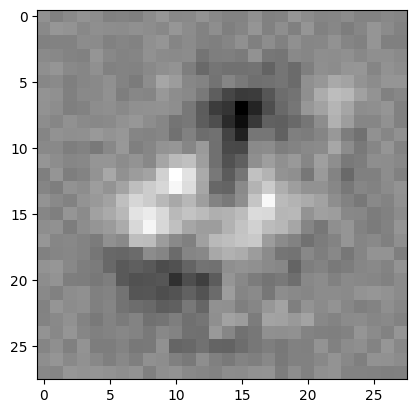

Acurácia: 0.938
epoca: 96
perda: 0.2700645


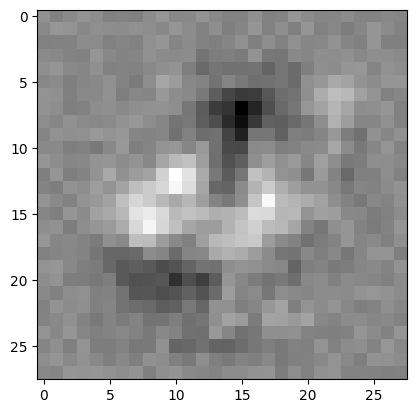

Acurácia: 0.939
epoca: 97
perda: 0.2686664


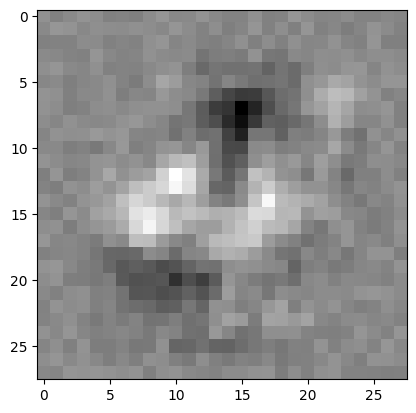

Acurácia: 0.939
epoca: 98
perda: 0.2672856


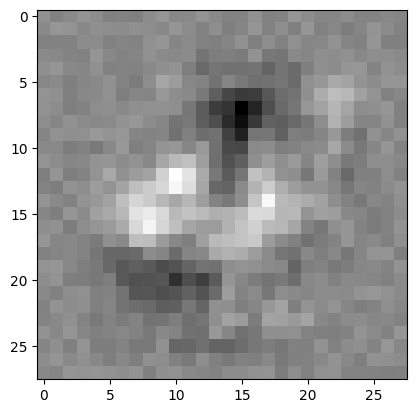

Acurácia: 0.94
epoca: 99
perda: 0.2659217


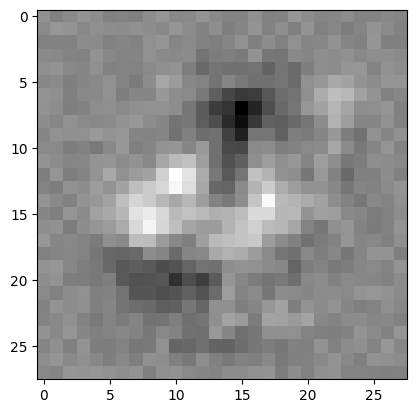

Acurácia: 0.94
epoca: 100
perda: 0.26457444


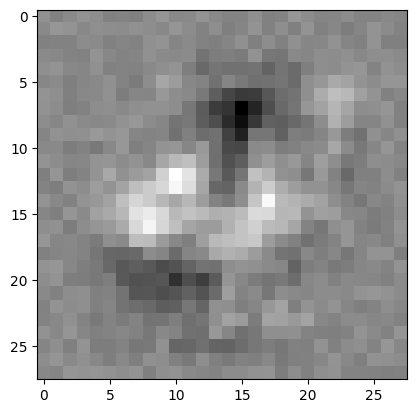

In [25]:
try:
    for i in range(epochs):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # Predict da rede
        outputs = model(inputs)
        zs.append(outputs[1].detach().numpy())

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.data)
        _, predicts = torch.max(outputs, 1)

        y_pred = predicts.data
        accuracy = (y_pred.numpy() == y_train.numpy()).mean()

        print('Acurácia:', accuracy)
        print("epoca: " + str(i + 1))
        print("perda: " + str(loss.data.detach().numpy()))

        weights = model.state_dict()['weight']

        # Visualizando pesos da classe 3
        plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
        plt.show()

except KeyboardInterrupt:
    pass

<details>
<summary>Mostrar Resultado</summary>

```python
from IPython import display
import numpy
a = 5
losses = []
zs = []
fig = plt.figure(figsize=(18, 6))

try:
    for i in range(epochs):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # Predict da rede
        outputs = model(inputs)
        zs.append(outputs[1].detach().numpy())

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.data)
        weights_d = model.weight.data[4].numpy().reshape(28,28)
        weights_g = model.weight.grad.data[4].numpy().reshape(28,28)
        ww = np.concatenate((weights_d,weights_g),1)
        plt.imshow(ww.reshape((28,28*2)),cmap = 'gray')
        display.display(fig)
        display.clear_output(wait=True)
        input(i)
        
        _, predicts = torch.max(outputs, 1)

        y_pred = predicts.data
        accuracy = (y_pred.numpy() == y_train.numpy()).mean()
        print('Accuracy:', accuracy)
        print("epoca: " + str(i + 1))
        print("perda: " + str(loss.data.detach().numpy()))
except KeyboardInterrupt:
    pass
```

</details>



## Perguntas

1. Qual é o shape da matriz de entrada na rede?

    **R: (28,28)**
2. Qual é o shape da saída da rede?

    **R: (10, 1)**
3. Qual é o número total de parâmetros da rede, incluindo o bias?

    **R:28x28x10+10 = 7850**

# Aprendizados
